<a href="https://colab.research.google.com/github/PedroBVidal/T1_texture_segmentation/blob/main/Visao_T1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
def sliding_kernel_mean(matrix, kernel):
  """
  Aplica um kernel sobre a matriz sem overlap e retorna a média da operação em cada bloco.

  Args:
      matrix (np.ndarray): Matriz de entrada (2D).
      kernel (np.ndarray): Kernel (filtro) (2D).

  Returns:
      np.ndarray: Vetor com as médias de cada operação.
  """
  m_rows, m_cols = matrix.shape
  k_rows, k_cols = kernel.shape

#  if m_rows % k_rows != 0 or m_cols % k_cols != 0:
#  raise ValueError("A matriz deve ser divisível exatamente pelo tamanho do kernel.")

  result = []

  for i in range(0, m_rows, k_rows):
      for j in range(0, m_cols, k_cols):

          block = matrix[i:i+k_rows, j:j+k_cols]

          if block.shape != kernel.shape:
            continue
          multiplied = block * kernel
          mean_value = multiplied.mean()
          result.append(mean_value)

  return np.array(result)

In [ ]:
def run_kernel_lib(matrix):

  laplacian = np.array(
    [[0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]])

  h_edge = np.array(
    [[-1, -1, -1],
    [0, 0, 0],
    [1, 1, 1]])

  v_edge = np.array(
    [[-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]])

  h_scharr = np.array(
    [[3, 0, -3],
    [0, 0, 0],
    [-3, -10, -3]])

  v_scharr = np.arrequipamentos unicoay(
    [[3, 10, 3],
    [0, 0, 0],
    [-3, -10, -3]])

  return np.array([sliding_kernel_mean(matrix,k) for k in [laplacian,h_edge,v_edge,h_scharr,v_scharr]])

In [ ]:

input = '/content/test4.jpg'
if not os.path.exists(input):
    print(f"Erro: O arquivo '{input}' não foi encontrado.")
    exit()

imagem = cv2.imread(input, cv2.IMREAD_GRAYSCALE)
if imagem is None:
    print("Erro ao carregar a imagem.")
    exit()

Erro: O arquivo '/content/test4.jpg' não foi encontrado.
Erro ao carregar a imagem.


In [ ]:
from sklearn.cluster import KMeans

result_kernels = run_kernel_lib(imagem)
print(result_kernels.shape)
result_kernels = np.transpose(result_kernels)
print(result_kernels.shape)

kmeans = KMeans(n_clusters=2, random_state=42).fit(result_kernels)
x = int(imagem.shape[0]/3)
y = int(imagem.shape[1]/3)

labels = kmeans.labels_.reshape((x,y))

# 7. Visualizar resultado
plt.figure(figsize=(157,252))
plt.subplot(1,4,1); plt.imshow(labels, cmap='gray'); plt.title('Segmentação')
plt.tight_layout(); plt.show()
print(labels.shape)

In [ ]:
def transform_to_image(img, image_one_dimentional):
    import numpy as np
    new_shape = (img.shape[0] // 3, img.shape[1] // 3)
    image_matrix = image_one_dimentional.reshape(5, img.shape[0] // 3, img.shape[1] // 3)
    return image_matrix

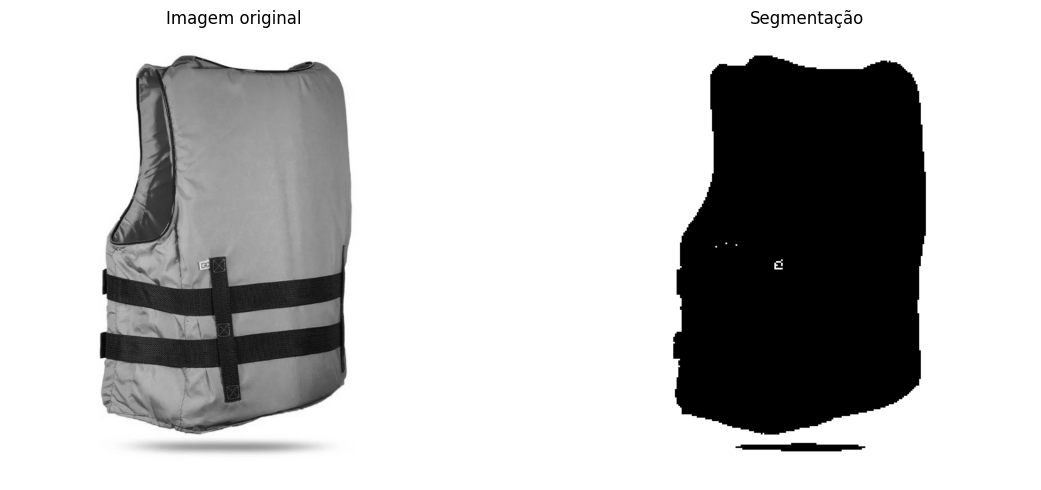

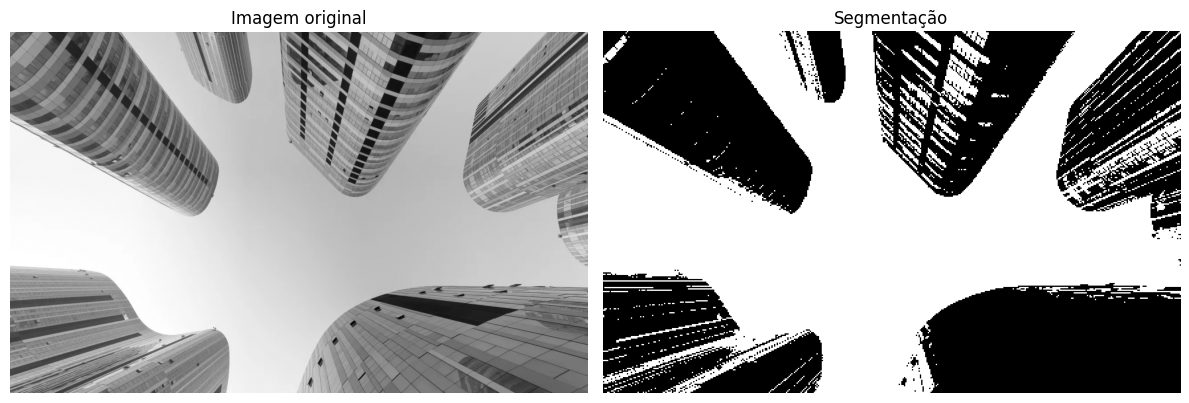

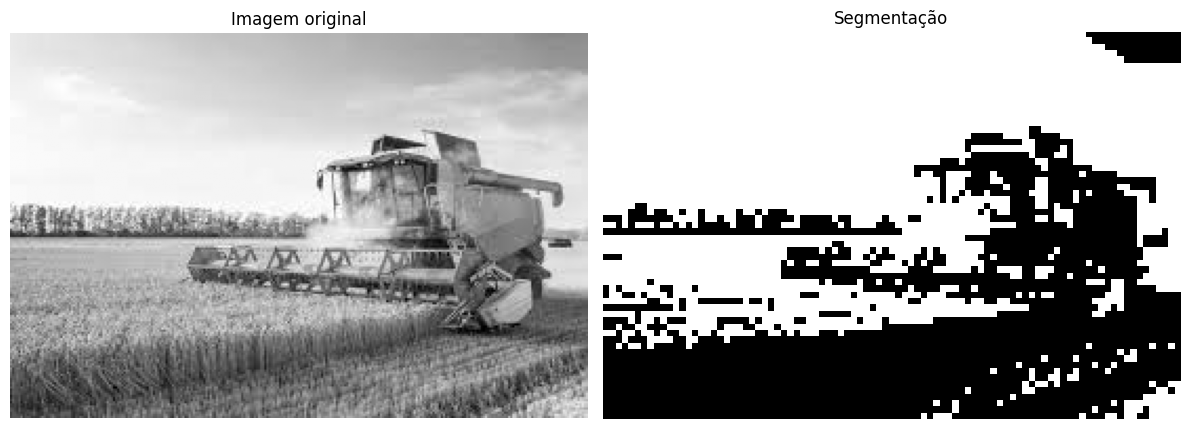

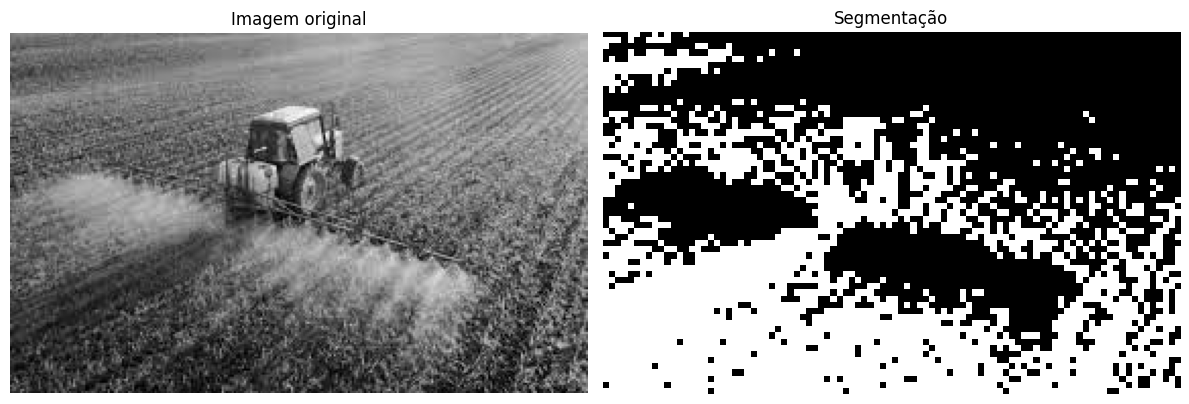

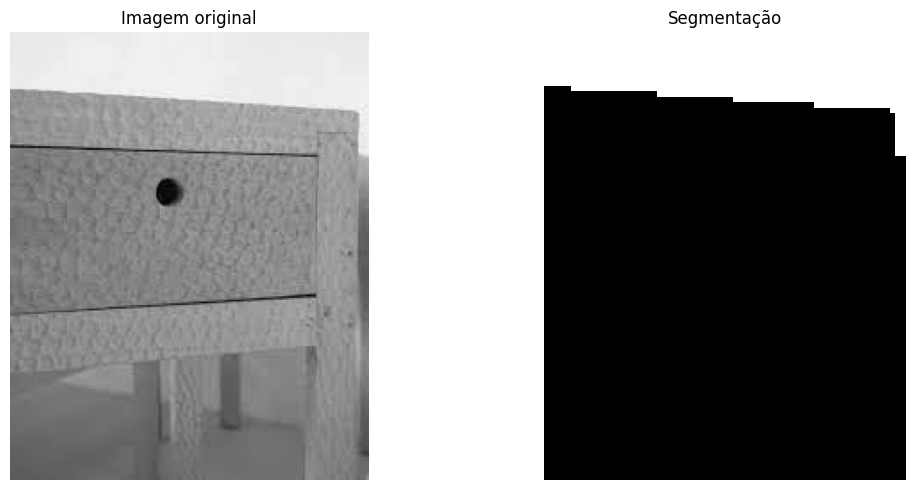

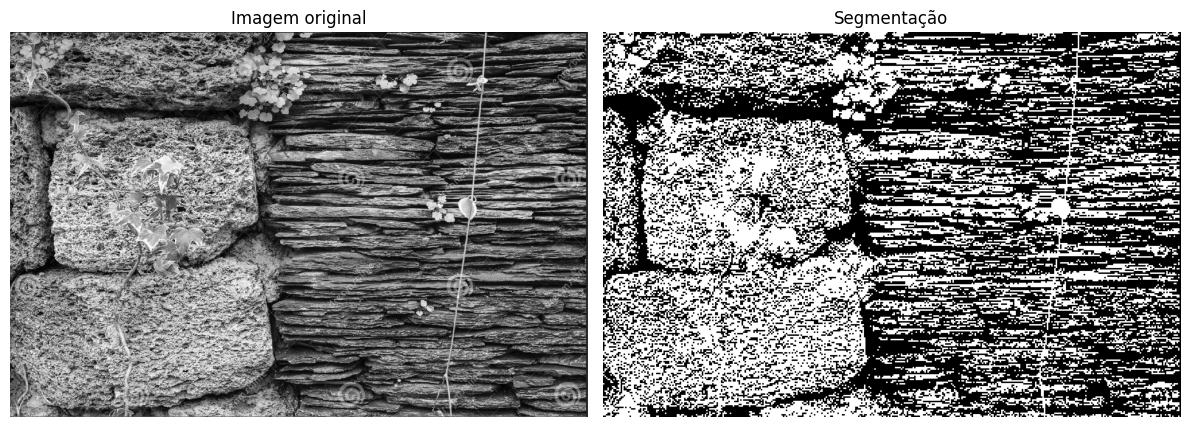

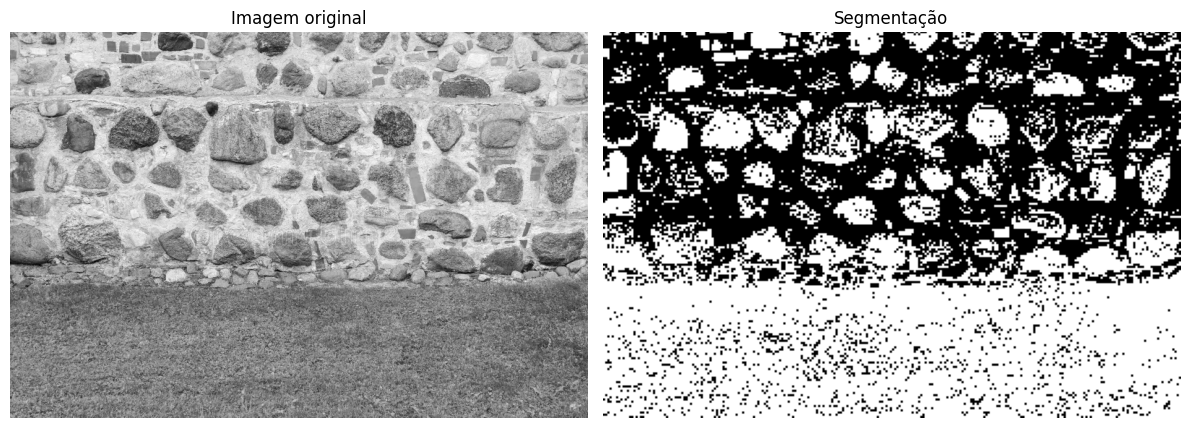

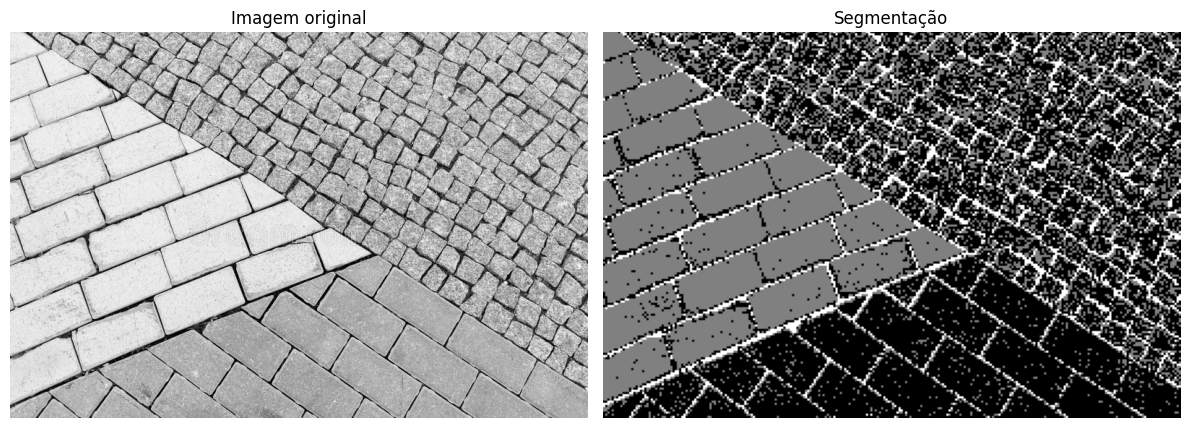

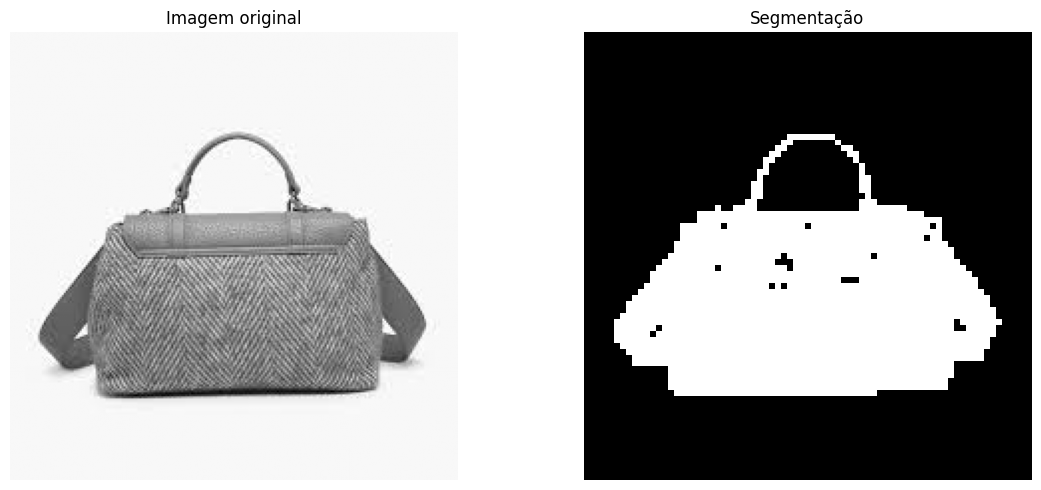

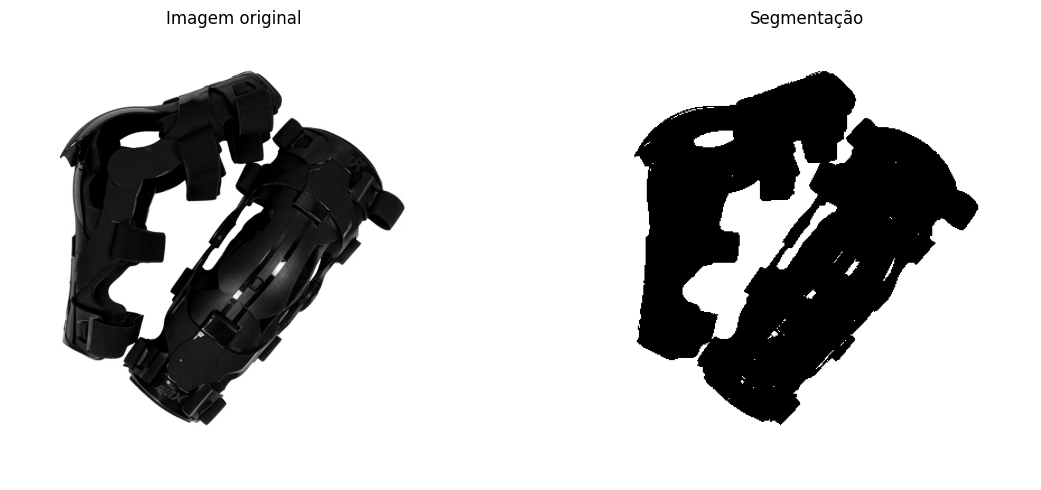

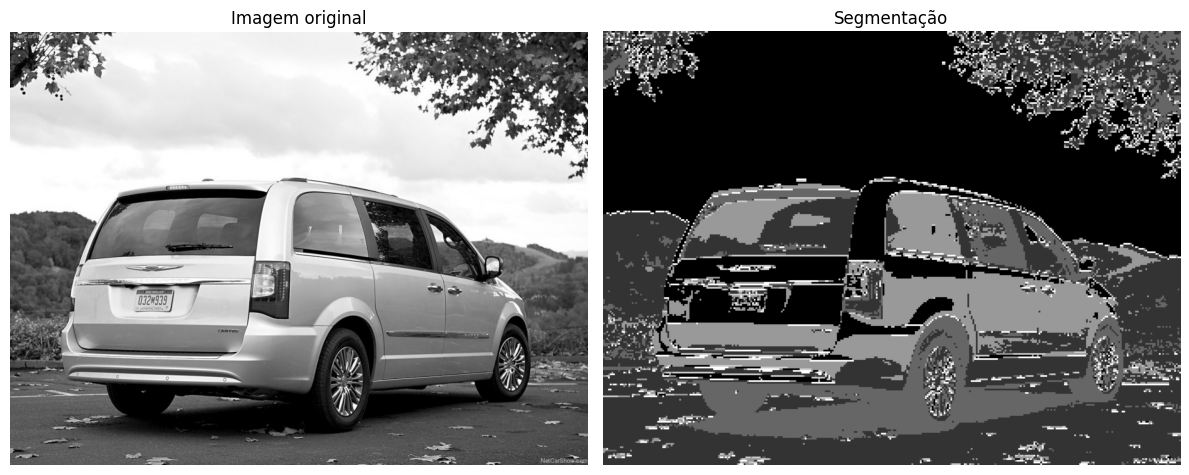

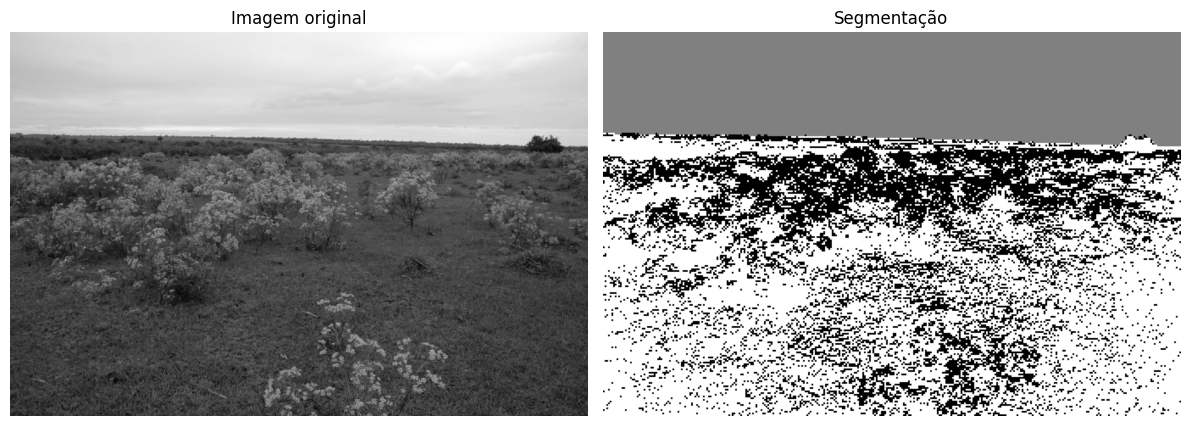

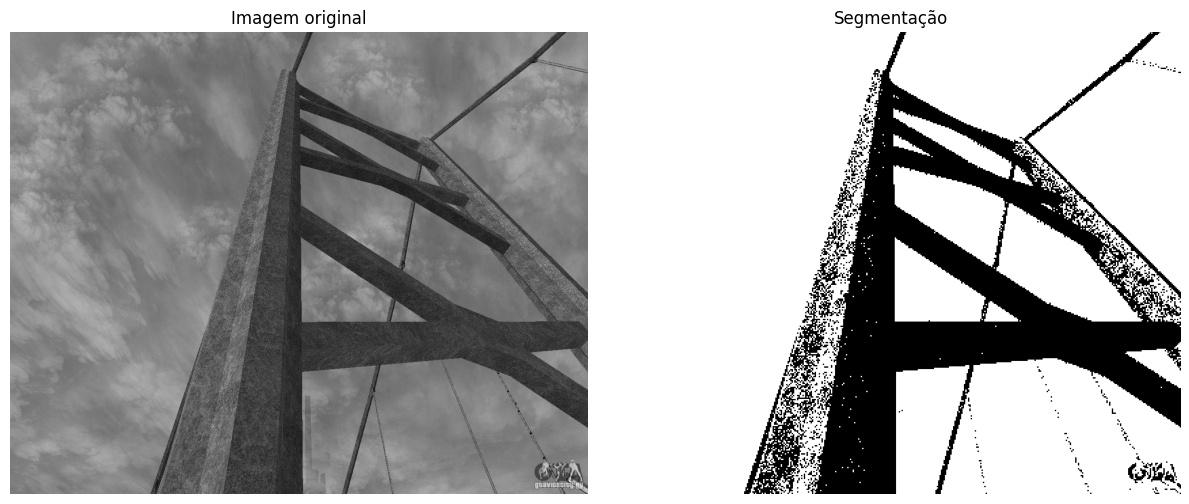

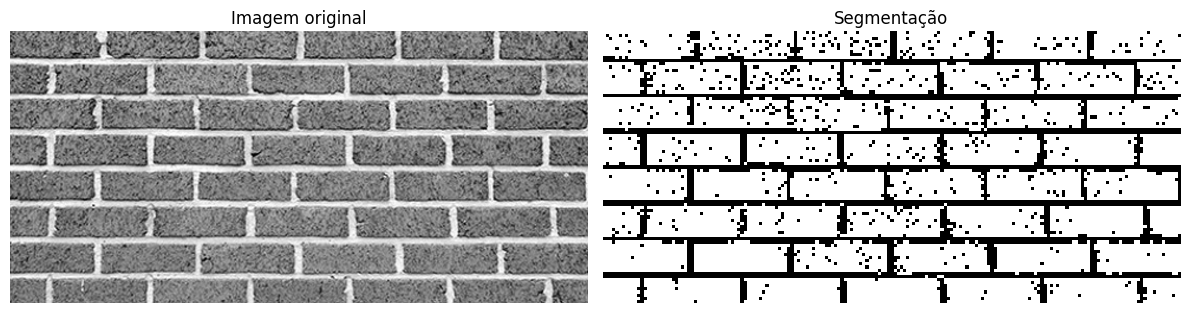

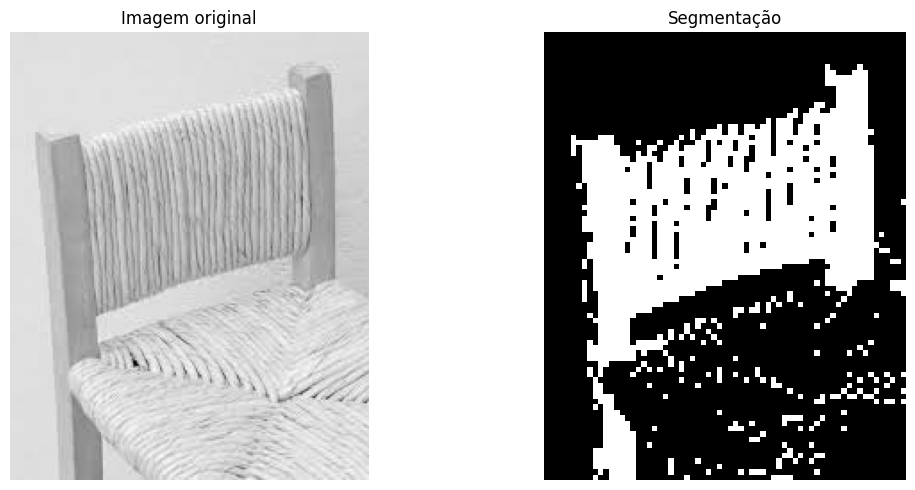

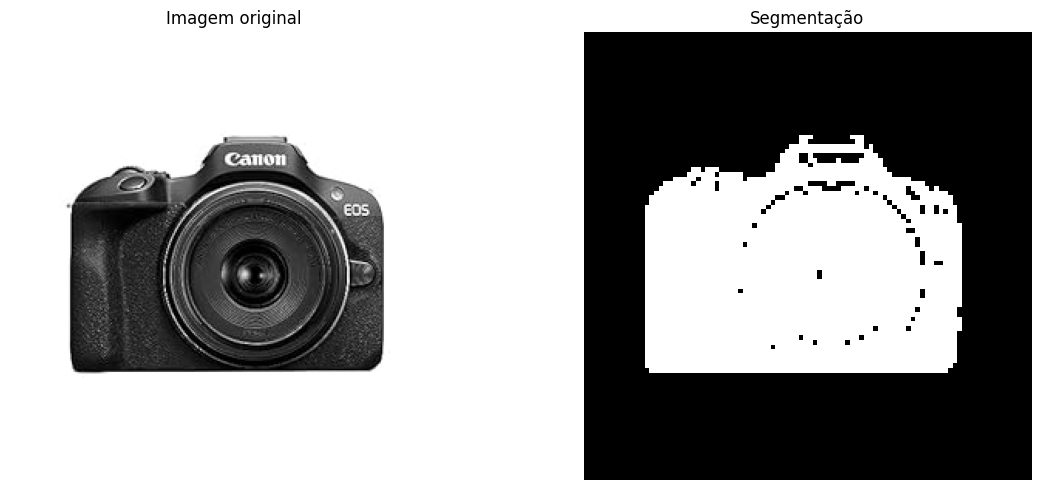

In [25]:
from skimage.transform import resize
from sklearn.cluster import KMeans
import os

# Roda processamento de 16 imagens com filtros já definidos e segmenta as imagens de acordo
# com o numero de clusters definido
num_imgs = 16
file_template = '/content/image{}.jpg'

num_c = [2,2,2,2,2,2,2,3,2,2,6,3,2,2,2,2]
for img_idx in range(num_imgs):
    input_path = file_template.format(img_idx)
    if not os.path.exists(input_path):
        print(f"Erro: O arquivo '{input_path}' não foi encontrado.")
        continue

    imagem = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)
    if imagem is None:
        print(f"Erro ao carregar a imagem: {input_path}")
        continue

    result = [run_kernel_lib(imagem)]
    layer = imagem.copy()

    all_imgs = []
    fisrt_img_one_d = run_kernel_lib(layer)
    processed_imgs = transform_to_image(layer, fisrt_img_one_d)
    target_shape = (imagem.shape[0] // 3, imagem.shape[1] // 3)
    resized_imgs = np.array([resize(im, target_shape, anti_aliasing=True) for im in processed_imgs])
    for img in resized_imgs:
        all_imgs.append(img.ravel())   # or img.flatten()

    for i in range(4):
        layer = cv2.pyrDown(cv2.GaussianBlur(layer, (3,3), cv2.BORDER_DEFAULT))
        one_dimension_processed_img = run_kernel_lib(layer)
        result.append(one_dimension_processed_img)
        processed_imgs = transform_to_image(layer, one_dimension_processed_img)
        target_shape = (imagem.shape[0] // 3, imagem.shape[1] // 3)
        resized_imgs = np.array([resize(im, target_shape, anti_aliasing=True) for im in processed_imgs])
        for img in resized_imgs:
            all_imgs.append(img.ravel())   # or img.flatten()

    all_imgs = np.stack(all_imgs, axis=0)

    result_kernels = run_kernel_lib(imagem)
    result_kernels = np.transpose(result_kernels)

    num_clusters = num_c[img_idx]
    kmeans = KMeans(n_clusters=num_clusters, random_state=42).fit(result_kernels)
    x = int(imagem.shape[0] / 3)
    y = int(imagem.shape[1] / 3)

    labels = kmeans.labels_.reshape((x, y))

    # 7. Visualizar resultado
    fig, axs = plt.subplots(1, 2, figsize=(12, 5)) # 1 linha, 2 colunas

    axs[0].imshow(imagem, cmap='gray')
    axs[0].set_title("Imagem original")
    axs[0].axis("off")

    axs[1].imshow(labels, cmap='gray')
    axs[1].set_title("Segmentação")
    axs[1].axis("off")

    plt.tight_layout()
    plt.show()

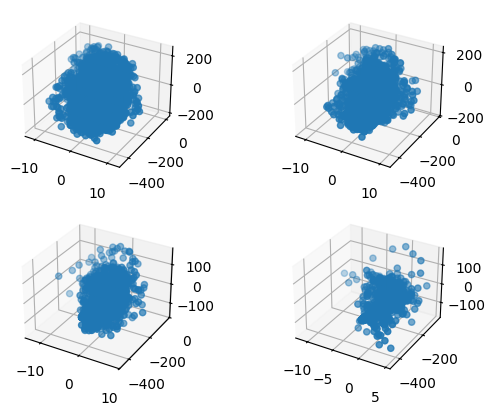

In [ ]:
fig = plt.figure()

for i in range(1,5):
  ax = plt.subplot(2, 2, i,projection='3d')
  ax.scatter(result[i][0],result[i][3],result[i][4])
plt.show()